In [1]:
%load_ext autoreload
%autoreload 2

import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import h5py
import imageio
import matplotlib
import gc
import sys
import io
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from scipy.optimize import curve_fit
import scipy.integrate


# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM
plt.rcParams.update({'font.size': 14})  

tidy3dAPI = os.environ["API_TIDY3D_KEY"]
plt.rc('font', family='Arial')


In [2]:
file = rf"20250821_LSU_ff_0p2.h5"
data_loaded = read_hdf5_as_dict(file)
data_loaded.keys()


dict_keys(['cell_size', 'n_values', 'raw_freqs', 'sizes', 'transmission_data'])

In [3]:
#Get right keys
n_values = data_loaded["n_values"]
n_values=n_values[:]
sizes_list = np.concatenate([[0],data_loaded["sizes"]])

In [4]:
transmission_exit = np.array([[np.ones((400)) if size==0 else data_loaded["transmission_data"][str(n_item)][str(size)]["exit"]
                      for size in sizes_list] for n_item in n_values])

transmission_exit.shape

(18, 17, 400)

In [5]:
data = {
    "n": n_values,
    "sizes": sizes_list,
    "freqs": data_loaded["raw_freqs"],
    "transmission_exit":transmission_exit

}

data_hollow = AM.read_hdf5_as_dict(rf"20250910_LSU_hollow_ff_0p2.h5")
transmission_exit_hollow = np.array([data_hollow["transmission_data"]["3.42"]["1.0"][str(ffh)]["exit"] for ffh in data_hollow["ffh"]])
transmission_exit_hollow.shape

(5, 400)

In [13]:
data["sizes"].shape
data["sizes"]

array([0.  , 0.07, 0.1 , 0.2 , 0.25, 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 ,
       0.9 , 1.  , 1.2 , 1.3 , 1.5 , 1.7 ])

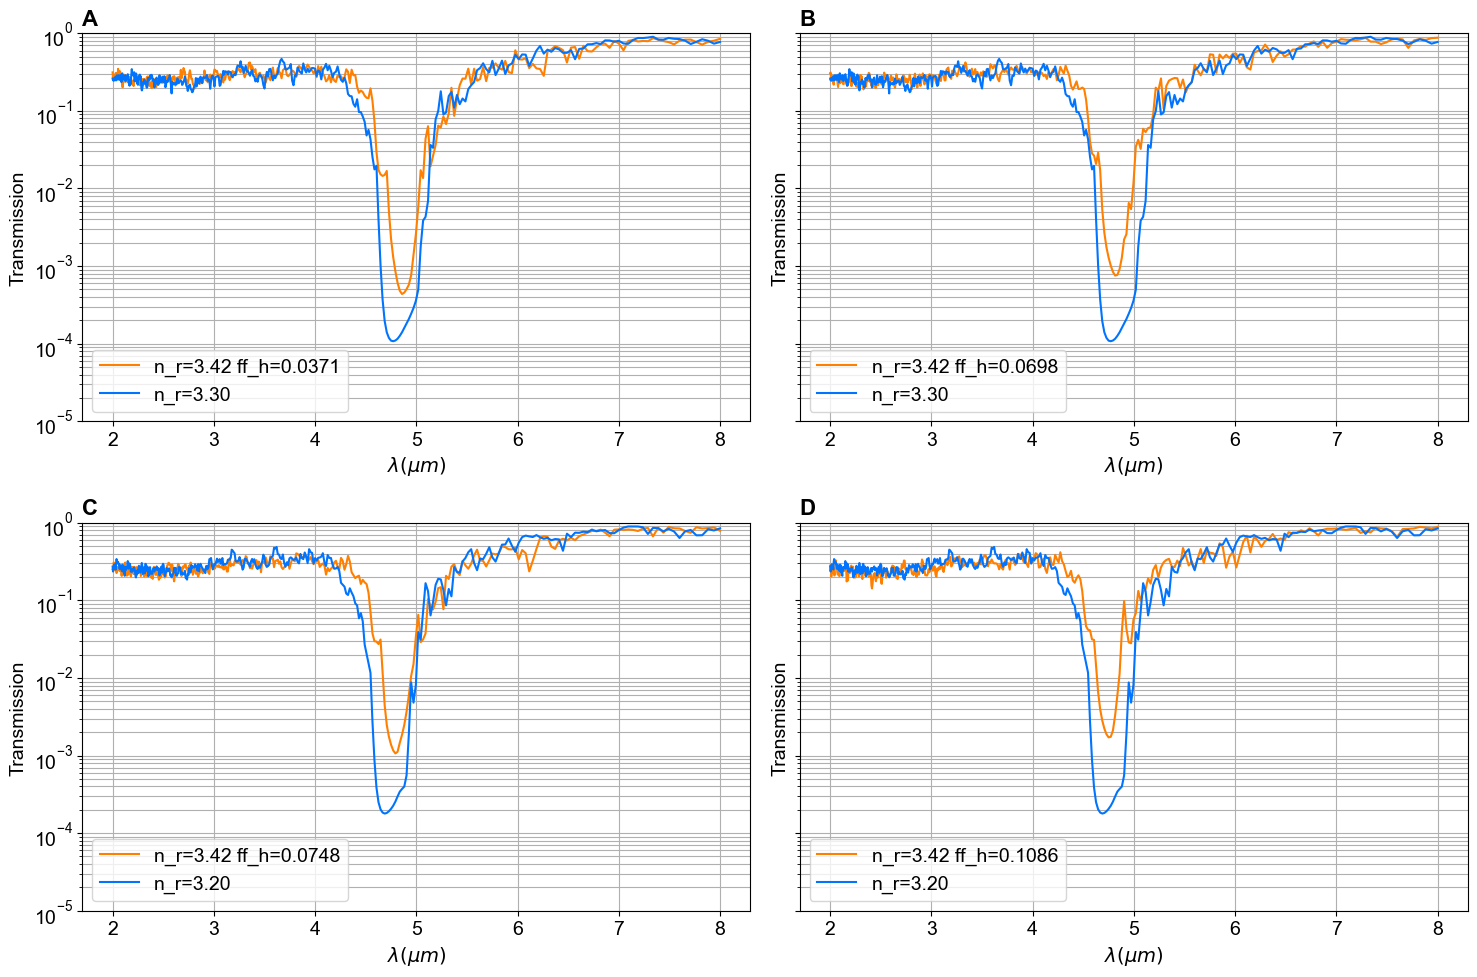

In [11]:
colors = plt.cm.gist_rainbow(np.linspace(0, 1, 20))
colors_2 = plt.cm.Set1(np.linspace(0, 1, 5))
fig,ax=plt.subplots(2,2,figsize=(15, 10),sharey=True)
n_values_i = [3.3, 3.3, 3.2, 3.2]
ax_i = ax.flatten()
Titles = [r"A",r"B",r"C",r"D",r"E"]
for h,item in enumerate(ax_i):
    try:
        item.plot(0.8*td.C_0/data["freqs"],transmission_exit_hollow[h+1],label=rf"n_r={3.42:.2f} ff_h={data_hollow["ffh"][h+1]:.4f}",color=colors_2[2])
        index = np.where(np.isclose(data["n"], n_values_i[h]))[0][0]
        item.plot(0.8*td.C_0/data["freqs"],data["transmission_exit"][index,12,:],label=rf"n_r={n_values_i[h]:.2f}",color=colors[13])
        item.legend()
        item.set_yscale("log")
        item.set_xlabel(rf"$\lambda (\mu m)$")
        item.grid(True,which="both")
        item.set_ylim([1e-5,1])
        item.set_ylabel("Transmission")
        item.set_title(Titles[h],loc="left",fontweight='bold',fontsize=16)
    except Exception as e:
        print(f"Error occurred in subplot {h}: {e}")

plt.tight_layout()

plt.show()

In [8]:
# dir_plot = Path(rf"H:\phd stuff\tidy3d\output\LSU Data\ThicknessEpsVariations")
# dir_plot.mkdir(parents=True,exist_ok=True)
# colors = plt.cm.gist_rainbow(np.linspace(0, 1, 20))
# colors_2 = plt.cm.Set1(np.linspace(0, 1, 5))
# fig,ax=plt.subplots(1,2,figsize=(20, 5),sharey=True)
# for i,n in enumerate(data["n"]):
#     if n<2.8 or n>3.6:
#         continue
#     for j,size in enumerate(data["sizes"]):
#         if size==1:
#             ax[0].plot(0.8*td.C_0/data["freqs"],data["transmission_exit"][i,j,:],label=rf"n_r={n:.2f}",color=colors[i])

# ax[0].legend()
# ax[0].set_yscale("log")
# ax[0].set_xlabel(rf"$\lambda[\bar d_0]$")
# ax[0].set_ylabel("Transmission")
# ax[0].grid(True,which="both")
# ax[0].set_title("Transmission solid rods ff=0.2")
# ax[0].set_ylim([1e-5,1])

# for k,item in enumerate(data_hollow["ffh"]):
#     ax[1].plot(0.8*td.C_0/data["freqs"],transmission_exit_hollow[k],label=rf"n_r={3.42:.2f} ff_h={item:.4f}",color=colors_2[k])
# ax[1].legend()
# ax[1].set_yscale("log")
# ax[1].set_xlabel(rf"$\lambda[\bar d_0]$")
# ax[1].grid(True,which="both")
# ax[1].set_title("Transmission hollow random distributed size rods ff=0.2")
# ax[1].set_ylim([1e-5,1])
# plt.tight_layout()

# plt.show()